# $$ Multivariate~~Linear~~Regression $$

## **Defintion and Usage**

This is the same as univariate linear regression with the only change is instead of one independent variable, we will use **multiple** independent variables (input).

# Notation

$x_j^{(i)}$ = value of feature $j^{th}$ in the $i^{th}$ training example.<br><br>
  $x^{(i)}$ = the input (features) of the $i^{th}$ training example.<br>
$~~ m =$ the number of training examples.<br>
$~~~ n =$ the number of features.<br>

For example:<br>
$$ x_1~~x_2~~x_3 $$
$$\begin{bmatrix} 1 & 2 & 1 \\ 3 & 0 & 1 \\ 0 & 2 & 4 \end{bmatrix}$$
<br><br>

With the matrix above, the rows indicate the number of training examples, the columns indicate the number of features.<br><br>
If we say $x^{(2)}$, that means we are taking a row vector $\begin{bmatrix} 3 & 0 & 1 \end{bmatrix}$ which is the input of the second training example.<br><br>
If we take $x_2^{(3)}$ that means we are referring to third row, second column which is 2.

# General form of Multivariate Linear Regression

$$f_\theta(x) = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + ... + \theta_n x_n $$

Using linear algebra notation:<br>
$$f_\theta(x) = \begin{bmatrix} \theta_0 & \theta_1 & \theta_2 & ... & \theta_n \end{bmatrix} \begin{bmatrix} x_0 \\ x_1 \\ x_2 \\ ... \\ x_n \end{bmatrix} = \theta^T x $$

$x^{(i)}_0 = 1$ for $ (i \in 1,...~,m) $

# Gradient Descent for Multiple Variables

This is the same as with one variable. But now we have a set of features. 
    $$\theta_j = \theta_j - \alpha \frac{\partial}{\partial \theta_j} J(\theta_j)$$
    $$\theta_j = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^{m}{[(h_\theta(x^{(i)}) - y^{(i)})  \phi_j(x^{(i)})]}$$
    (simutaneously update $\theta_j$ for $ j = 0, 1, 2, ..., m$)

# Feature Scaling

We can speed up gradient descent by having each of our input values in roughly the same range. This is because $\theta$ will descend quickly on small ranges and slowly on large ranges, and so will oscillate inefficiently down to the optimum when the variables are very uneven.<br><br>
The way to prevent this is to modify the ranges of our input variables so that they are all roughly the same. Ideally:

$$ −1 \leqslant x_{i} \leqslant 1 $$
or 
$$ -0.5 \leqslant x_{i} \leqslant 0.5 $$

The goal is to get all input variables into roughly one of these ranges. This is called **Feature scaling**. In data processing, it is also known as **Data normalization** and is generally performed during the **data processing** step.<br><br>
There are two techniques to achieve this:
1. **Max - Min normalization**.<br>
2. **Mean normalization**.

The general formula for Standardization is:
    $$ x_i = \frac{x - \mu_i}{\sigma} $$
* $\mu_i$ is the average of all the values for feature $i^{th}$
* $\sigma$ is the standard deviation (which can be found <a href="https://en.wikipedia.org/wiki/Standard_deviation" target="_blank">here</a>), or the range between Max - Min value.

## **Max - Min normalization**

Max - Min normalization involves dividing the input values by the ranges of the input variable, resulting in a new range around $1$ .<br>
**General Formula** for a Min - Max of $[0, 1]$ is given as:
$$x_i = \frac{x_i - x_{min}}{\sigma} = \frac{x_i - x_{min}}{x_{max} - x_{min}}$$

To rescale between an arbitrary set of values $[a, b]$ , the formula becomes:
$$x_i = a + \frac{(x_i - x_{min})(b - a)}{\sigma} = a + \frac{(x_i - x_{min})(b - a)}{x_{max} - x_{min}} $$


## **Mean normalization**

Mean normalization involves subtracting the average value for an input variable from the values for that input variable resulting in a new average value for the input variable of just zero.<br>
**General Formula**:
$$x_i = \frac{x_i - \mu_i}{\sigma} = \frac{x_i - \mu_i}{x_{max} - x_{min}}$$

# Choosing Learning rate $\alpha$

The strategy to choose the most optimal learning rate is by choosing a random value then decrease/increase it accordingly. For example, we first choose the value of $\alpha = 0.01$. By evaluating the performance of Gradient Descent, we can either increase it by $3$ times ( $0.03$ ) or decrease it by $3$ times ( $0.0003$ ), and so on until the performance is optimal.

There are two ways to identify the correct learning rate $\alpha$ :
* **Debugging gradient descent**.
* **Automatic convergence test**.

## **Debugging gradient descent**

By plotting cost function $J(\theta)$ against number of iterations, we can evaluate whether we chose the sufficient $\alpha$ or not. There are three possible kinds of plot:
1. Rises or oscillate back and forth (this happens when $\alpha$ is too large, making it may not converge).
2. Drops gradually (when the $\alpha$ is small but too small, which leads to the convergence process is slow).
3. Sharp decline (this when the $\alpha$ is sufficiently small, this is the optimal value for learning rate).

## **Automatic convergence test**

Declare convergence if $J(θ)$ decreases by less than E in one iteration, where E is some small value such as $10^{−3}$. However in practice it's difficult to choose this threshold value.

# Special case: Polynomial Regression

Polynomial Regression uses a hypothesis with an n-degree function:
$$f(\theta) = \theta_0 + \theta_1 x + \theta_2 x^2 + ... + \theta_n x^n$$
By considering each $\phi(x)$ as an independent variable, we can see that Polynomial Regression can be treated as a Multivariate Linear Regression with every $x^{(i)}$ = $\phi_i(x)$ .
<br>**Note**: With higher degree functions, we should use feature scaling to reduce the range of each input.

# Normal Equation

The normal equation can be used to substitute for Gradient Descent when the number of features are small. The result of this equation is the optimized $\theta$ :
$$ \theta = (X^{T}X)^{-1}X^{T}y$$

## **Pros and cons**

**Gradient Descent:** 
* Time complexity: $O(kn^2)$
* Pros:
    * Works well even if $n$ is large ( $n \geqslant 10^6 $ ).
* Cons:
    * Needs to choose the sufficient learning rate $\alpha$ .
    * Needs many iterations.
    * Can suffer from vanishing gradient.
    * Have to use feature scaling in some cases.

**Normal Equation:**
* Time complexity: $O(n^3)$
* Pros:
    * No need to choose $\alpha$ .
    * No need to iterate.
    * No need to use feature scaling.
* Cons:
    * Needs to calculate the inverse of $X^{T}X$. If it cannot be inverted then we cannot use normal equation.
    * Slow if $n$ is very large.

## **Exception handling**

When $X^{T}X$ is **noninvertible**, the common causes might be having:
* Redundant features, where 2 features are closely related. (i.e. They are linearly dependent).
* Too many features (e.g. $m \leqslant n$ ). In this case, delete some features or use "regularization" technique.<br>

<br>Solutions to the above problems include deleting a feature that is linearly dependent with another or deleting one or more features when there are too many features.

## **Summary**

In practice, if the number of features is smaller than $10,000$ then normal function is the way to go. Else we should use Gradient Descent for better performance.

# Demo Model

## **Data preprocessing**

### **Read input, build DataFrame and plot data points**

In [1]:
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

header_list = ['Area', 'Number of Bedrooms', 'Price']

df = pd.read_csv("/Users/danielnguyen/Repo/AI/Training_set/house_pricing.csv", names=header_list, header=0)

m = len(df)

df.tail()

,Area,Number of Bedrooms,Price
42,2567,4,314000
43,1200,3,299000
44,852,2,179900
45,1852,4,299900
46,1203,3,239500


Now we set $X$ equals to a matrix contains [Area, Number of Bedrooms] and $y$ contains the price as a column vector.

In [2]:
X = np.array(df.iloc[:, 0:2])
y = np.array(df.iloc[:, [-1]])

print(X[:5])
print(y[:5])

[[2104    3]
 [1600    3]
 [2400    3]
 [1416    2]
 [3000    4]]
[[399900]
 [329900]
 [369000]
 [232000]
 [539900]]


Now we will plot every data points onto a 3D plot for better visualization.

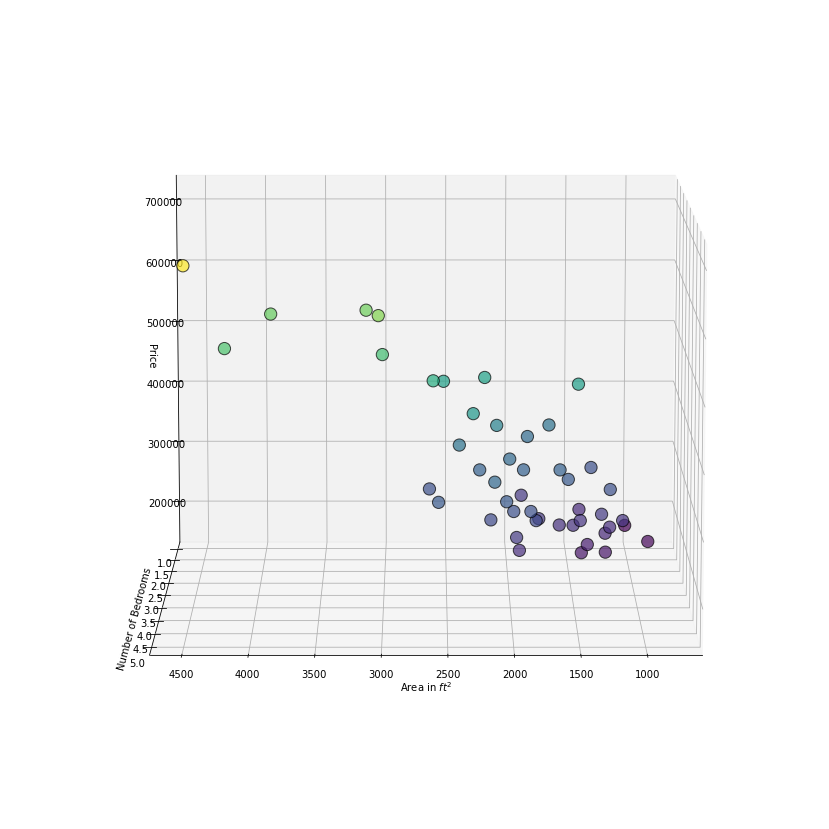

In [3]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=10., azim=90)

ax.set_xlabel('Area in ' + r'$ft^2$')
ax.set_ylabel('Number of Bedrooms')
ax.set_zlabel('Price')

sc = ax.scatter(X[:,0], X[:, 1], y, edgecolor='k', s=150, alpha=.7, c=y)

As we can see from $X$ , the range of **first** column **(Area)** is very large while the range of the **second** column **(Number of Bedrooms)** are small. This could cause the Gradient Descent algorithm to be inefficient. Therefore we need to normalize our data using **mean normalization**.

### **Normalizing data**

We can use either **Max - Min Normalization** or **Mean Normalization** . However, I will use the second one for easier implementation. To use it we have to calculate the mean $\mu$ and the standard deviation $\sigma$ of each column (each feature).

We can write a `for` loop for this but it is not efficient, in the `numpy` library we have `numpy.mean()` to calculate the mean element of an array. By specifying `numpy.mean(X, 0)`, we are calculating the mean $\mu_i$ of each column of the array $X$ . The output of this is a row vector containing the mean of each column. ($0$ specify the zeroth axis meaning the row axis, $1$ specify the first axis meaning the column axis).mSimilarly, we have to calculate the standard deviation $\sigma$ of $X$ by calling `numpy.std(X, 0)`

In [4]:
def mean_normalization(X) :
    """Normalize the range of each feature in X by using Mean Normalization"""
    mu = np.mean(X, 0)
    sigma = np.mean(X, 0)

    return (X - mu) / sigma, mu, sigma

In [5]:
X, mu, sigma = mean_normalization(X)
print(X[:5])

[[ 0.05164199 -0.05369128]
 [-0.20027225 -0.05369128]
 [ 0.19959163 -0.05369128]
 [-0.29224094 -0.36912752]
 [ 0.49948954  0.26174497]]


## **Choose the hypothesis**

Our goal is to find our hypothesis $f_\theta(x)$ , which is a plane, fit the most points.
$$f_\theta(x) = \theta^{T} X =\theta_0 + \theta_1 x_1 + \theta_2 x_2$$

### **Vectorizating the variables**

**Vectorization** is a powerful tool to make our code more readable and shorter. This uses linear algebra to squeeze variables into matrices to make computation easier.

First we will initialize $\theta$ as a column vector containing all $\theta_i$ .
$$\theta = \begin{bmatrix} \theta_0 \\ \theta_1 \\ \theta_2 \\ ... \\ \theta_{n-1} \end{bmatrix}$$
Then we will initialized $X$ as an $m \times n$ matrix.
$$X = \begin{bmatrix} [x^{(0)}]^{T} \\ [x^{(1)}]^{T} \\ ... \\ [x^{(m-1)}]^T \end{bmatrix}$$
With $[x^{(i)}]^{T} = [x^{(i)}_0, x^{(i)}_1, ... , x^{(i)}_{n-1}]$ <br>
And because $x_0 = 1$ so $X$ will be:
$$X = \begin{bmatrix} 1 & x^{(0)}_1 & x^{(0)}_2 & ... & x^{(0)}_{n-1} \\ 1 & x^{(1)}_1 & x^{(1)}_2 & ... & x^{(1)}_{n-1} \\ ... & ... & ... & ... & ... \\ 1 & x^{(m-1)}_1 & x^{(m-1)}_2 & ... & x^{(m-1)}_{n-1} \end{bmatrix} $$

In [6]:
X = np.hstack((np.ones((m, 1)), X))
theta = np.zeros((3, 1))

print(X[:5])
print(theta)

[[ 1.          0.05164199 -0.05369128]
 [ 1.         -0.20027225 -0.05369128]
 [ 1.          0.19959163 -0.05369128]
 [ 1.         -0.29224094 -0.36912752]
 [ 1.          0.49948954  0.26174497]]
[[0.]
 [0.]
 [0.]]


With the given $\theta$ we can plot on to 3D plot for a better visualization. 

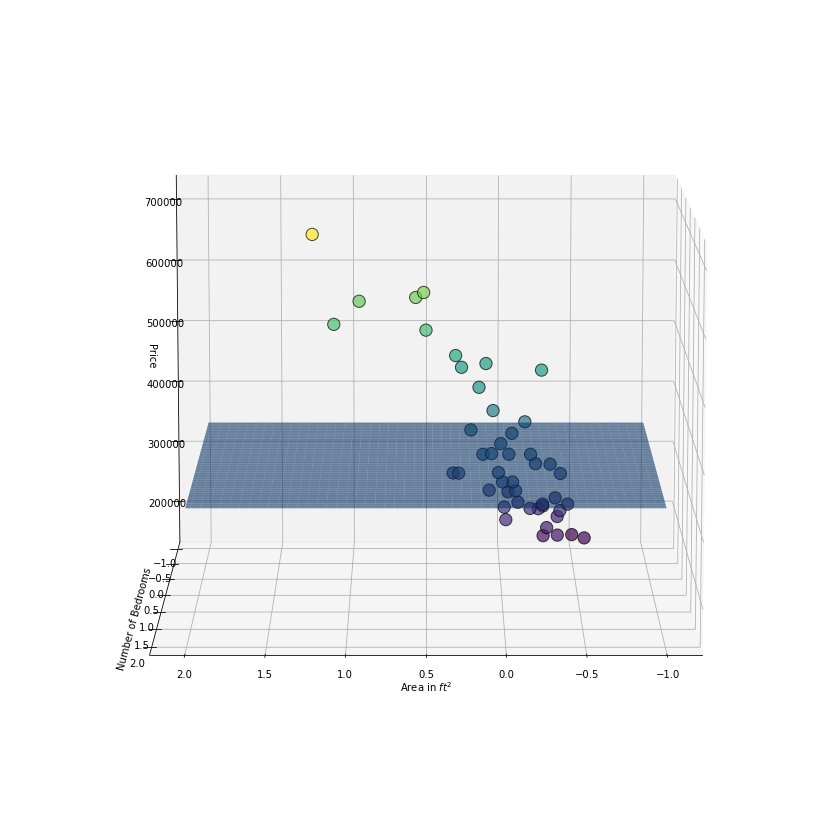

In [21]:
fig.clear()

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=10., azim=90)

ax.set_xlabel('Area in ' + r'$ft^2$')
ax.set_ylabel('Number of Bedrooms')
ax.set_zlabel('Price')

sc = ax.scatter(X[:,1], X[:, 2], y, edgecolor='k', s=150, alpha=.7, c=y)

x_plane, y_plane = np.meshgrid(np.linspace(-1, 2, 100), np.linspace(-1, 2, 100))

z = theta[0] + 0 * x_plane + 0 * y_plane

surf = ax.plot_surface(x_plane, y_plane, z, cmap=plt.cm.RdBu_r, alpha=0.6)

## **Calculate cost function**

Cost function $J(\theta)$ can be calculated with the $X$ and $\theta$ matrices.
$$J(\theta) = sum((\theta^{T}X - y)^2)$$

In [17]:
def calculate_cost(theta, x_matrix, y_matrix) :
    return np.sum(np.square(np.dot(x_matrix, theta) - y_matrix)) / (2 * len(y_matrix))

In [18]:
J = calculate_cost(theta, X, y)
print("Calculate the current cost:", J)

Calculate the current cost: 2043280050.602829


## **Optimizing our Model**

### **Gradient Descent**

As mentioned in the previous section, when updating $\theta_i$ , we have to do it simultaneously. The vectorized formula is:
$$\theta = \theta - \alpha \frac{\partial}{\partial \theta} J(\theta)$$
With: 
$$\frac{\partial}{\partial \theta} J(\theta) = \frac{X^{T}.(X . \theta - y)}{m} $$

In [19]:
def gradient_descent(theta, x_matrix, y_matrix, learning_rate=1.5, max_iterations=1000) :
    J_history = calculate_cost(theta, x_matrix, y_matrix)

    i = 0

    while i < max_iterations: 
        theta = theta - learning_rate / m * (np.dot(x_matrix.T, (np.dot(x_matrix, theta) - y)))

        J_history = np.hstack((J_history, calculate_cost(theta, x_matrix, y_matrix)))

        i += 1

        if J_history[-1] - J_history[-2] > 1e7 :
            raise ValueError("Learning rate is too high")

    return theta, J_history

[[340412.65957447]
 [278516.12977075]
 [-27701.37973908]]


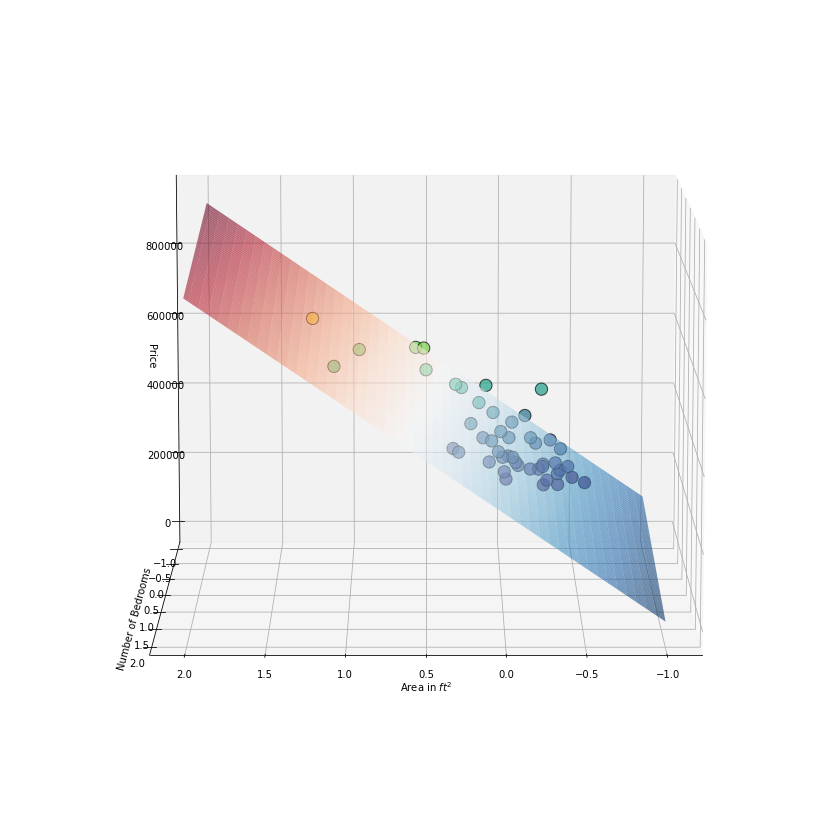

In [20]:
theta, j_arr = gradient_descent(theta, X, y)

print(theta)

fig.clear()

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=10., azim=90)

ax.set_xlabel('Area in ' + r'$ft^2$')
ax.set_ylabel('Number of Bedrooms')
ax.set_zlabel('Price')

sc = ax.scatter(X[:,1], X[:, 2], y, edgecolor='k', s=150, alpha=.7, c=y)

x_plane, y_plane = np.meshgrid(np.linspace(-1, 2, 100), np.linspace(-1, 2, 100))

z = theta[0] + theta[1] * x_plane + theta[2] * y_plane

surf = ax.plot_surface(x_plane, y_plane, z, cmap=plt.cm.RdBu_r, alpha=0.6)

### **Gradient Descent Performance**

2043280050.6028287


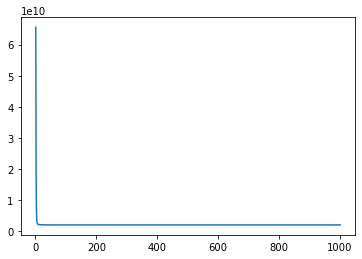

In [15]:
plt.plot(range(1, len(j_arr) + 1), j_arr)
print(j_arr[-1])

## **Normal Equation**

Since the number of features are small, we can use **Normal Equation** for faster computation.

In [22]:
def normal_equation(x_matrix, y_matrix) :
    return np.linalg.multi_dot((np.linalg.inv(np.dot(x_matrix.T, x_matrix)), x_matrix.T, y_matrix))

[[340412.65957447]
 [278516.12977075]
 [-27701.37973908]]


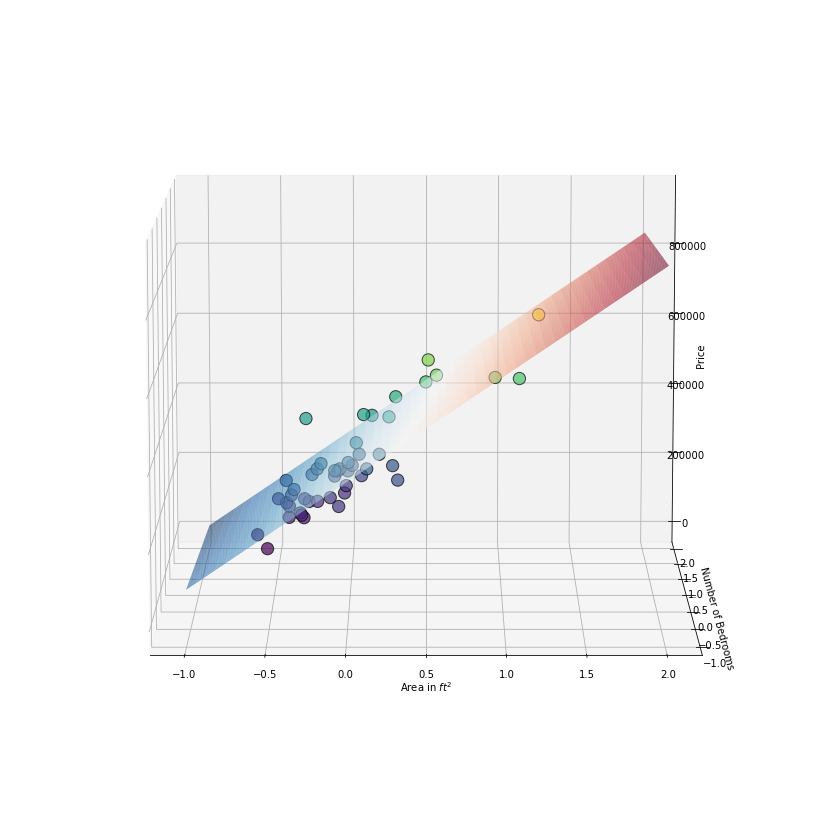

In [23]:
theta = normal_equation(X, y)

print(theta)

fig.clear()

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=10., azim=-90)

ax.set_xlabel('Area in ' + r'$ft^2$')
ax.set_ylabel('Number of Bedrooms')
ax.set_zlabel('Price')

sc = ax.scatter(X[:,1], X[:, 2], y, edgecolor='k', s=150, alpha=.7, c=y)

x_plane, y_plane = np.meshgrid(np.linspace(-1, 2, 100), np.linspace(-1, 2, 100))

z = theta[0] + theta[1] * x_plane + theta[2] * y_plane

surf = ax.plot_surface(x_plane, y_plane, z, cmap=plt.cm.RdBu_r, alpha=0.6)